In [2]:
import os
import sys
import importlib

# project_dir = '/home/kb3856/1-project-categorical-MMN'
project_dir = '/mnt/c/Users/kevin/OneDrive/2-code/1-Research_projects/1-project-categorical-MMN'
src_dir = os.path.join(project_dir, 'src')
sys.path.append(src_dir)
import parameters as params
import classes as cl
import basic_functions as bf
import numpy as np
import random
import pickle
import json

from itertools import product
from multiprocessing import Pool


data_dir = os.path.join(project_dir, 'database')


import sqlite3


def create_list_dict(d):
    ''' This function returns all the possible combinations of elements within the keys
    '''
    list_dict = []
    key_list = list(d.keys())
    length_list = [len(d[key]) for key in key_list]
    nbr_list = len(key_list)
    
    all_lists = list(product(*[d[key] for key in key_list]))
    return all_lists
   
dict_param = {
    'adaptation_list' : [-0.01],
'top_down_feedback_list' : [2.0],
'Tinter_list' : [0.5,0.7,1.0,1.5,2.0,3.0,5.0,0.2],
'dev_id_list' : [8,108,88,78,68,58,48,38,122],
'delay_list': [50.0,100.0],
'ndf_plasticity': [1],
'int_plasticity': [1],
'bool_sigma_ndf': [1],
'bool_sigma_int': [1],
'adaptation_tc': [0.1] ,
'nbr_rep': [1,2,3,4,5,6,7,8,9,10]
}
    
all_dicts = create_list_dict(dict_param)
random.shuffle(all_dicts)

def run_parallel(list_param):
  
#         print('a')
        params_stim = params.PARAMS_Stimulus.copy()
        params_sim = params.PARAMS_Simulation.copy()
        params_int = params.PARAMS_Integrator.copy()
        params_sst = params.PARAMS_SST.copy()
        params_ndf = params.PARAMS_NDF.copy()
        params_pc = params.PARAMS_PC.copy()
        params_vip = params.PARAMS_VIP.copy()
        params_pv = params.PARAMS_PV.copy()
        params_syn = params.PARAMS_Synapses_Integrator.copy()

        params_stim['prob_std'] = 0.8
        # params_stim['t_total'] = params_stim['Tresting'] + (params_stim['nbr_rep_std']+2)*(params_stim['Tinter']+params_stim['Tstim'])#40.0 #in seconds, constant as the task is probabilistic
        # params.PARAMS_Simulation['N_t'] = int(params.PARAMS_Simulation['t_total']/self.PARAMS_Simulation['dt'])
        params_stim['list_std'] = [25, 50, 75, 100, 125]
        delay = list_param[4]*0.001
        params_stim['Tinter'] = list_param[2]
#         params_stim['Tresting'] = 0.01
        params_stim['nbr_rep_std'] = list_param[10]
#         params_stim['Tstim'] = 0.01
        params_stim['t_total'] = params_stim['Tresting'] + (params_stim['nbr_rep_std']+4)*(params_stim['Tinter']+params_stim['Tstim'])
#         print(params_stim['t_total'])
        for count_type,type_stim in enumerate(['deterministic_MMN']):
            # print(c)
            params_stim['type'] = type_stim
            params_pc['gA'] = list_param[0] #values are coherent with other papers
            params_sst['gA'] = list_param[0] #values are coherent with other papers

            params_stim['dev_id'] = list_param[3]
        
            if list_param[7] == 1:
                params_ndf['sigma_to_dend'] = 43.2
                params_ndf['weight_to_dend'] =  -2.0*0.89/15*20,#/20']

            else:
                params_ndf['sigma_to_dend'] = 1.2
                params_ndf['weight_to_dend'] = -2.0*0.89/15,#/20']

            if list_param[8] == 1:
                params_syn['wmax'] = list_param[1]*0.15/20 #it corresponds to a multiplier
                params_syn['weight_to_ndf'] = list_param[1]*0.15/20*20 #it corresponds to a multiplier
                params_syn['sigma_to_ndf'] = 43.2

            else:
                params_syn['wmax'] = list_param[1]*0.15/20 #it corresponds to a multiplier
                params_syn['weight_to_ndf'] = list_param[1]*0.15/20 #it corresponds to a multiplier
                params_syn['sigma_to_bdf'] = 1.2  
        
            
            
            params_syn['bool_plasticity'] = list_param[6]
            params_ndf['bool_plasticity'] = list_param[5]
            params_pc['tau_adaptation'] = list_param[9]
            params_sst['tau_adaptation'] = list_param[9]
            
            stim = cl.Stimulus(params_stim, params_sim, params_pc['Ncells'])

            my_network = cl.Network(params_int, params_syn, params_pc, params_pv, params_sst, params_vip, params_ndf, params_sim, params_stim)

            my_network.full_dynamics(stim.stimulus)


                    
            # fr_std, fr_dev = my_network.compute_mean_firing_rate(stim, delay = delay)
   
        
        # mmn = fr_dev - fr_std
        # mmn_norm = mmn/fr_std
       
 
    

        return my_network, stim#print(name)




n,s = run_parallel(all_dicts[1])

In [3]:
s

In [4]:
s.stimulus

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
all_dicts[1]


(-0.01, 2.0, 0.7, 122, 50.0, 1, 1, 1, 1, 0.1, 2)

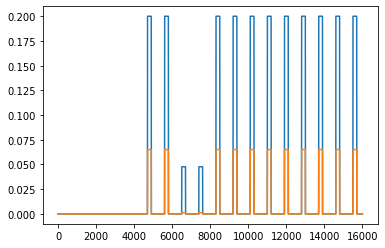

In [11]:
import matplotlib.pyplot as plt
plt.plot(s.stimulus[20,:])
plt.plot(s.stimulus[43,:])

In [13]:
n.compute_mean_firing_rate(s, delay = 0.05)

(807.492605311263, 1047.170373317157)